In [1]:
# Python imports and pre-definitions
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['font.size'] = 30

def parse_lammps_rdf(rdffile):
    """Parse the RDF file written by LAMMPS
    copied from Boris' class code: https://github.com/bkoz37/labutil
    """
    with open(rdffile, 'r') as rdfout:
        rdfs = []; buffer = []
        for line in rdfout:
            values = line.split()
            if line.startswith('#'):
                continue
            elif len(values) == 2:
                nbins = values[1]
            else:
                buffer.append([float(values[1]), float(values[2])])
                if len(buffer) == int(nbins):
                    frame = np.transpose(np.array(buffer))
                    rdfs.append(frame)
                    buffer = []
    return rdfs

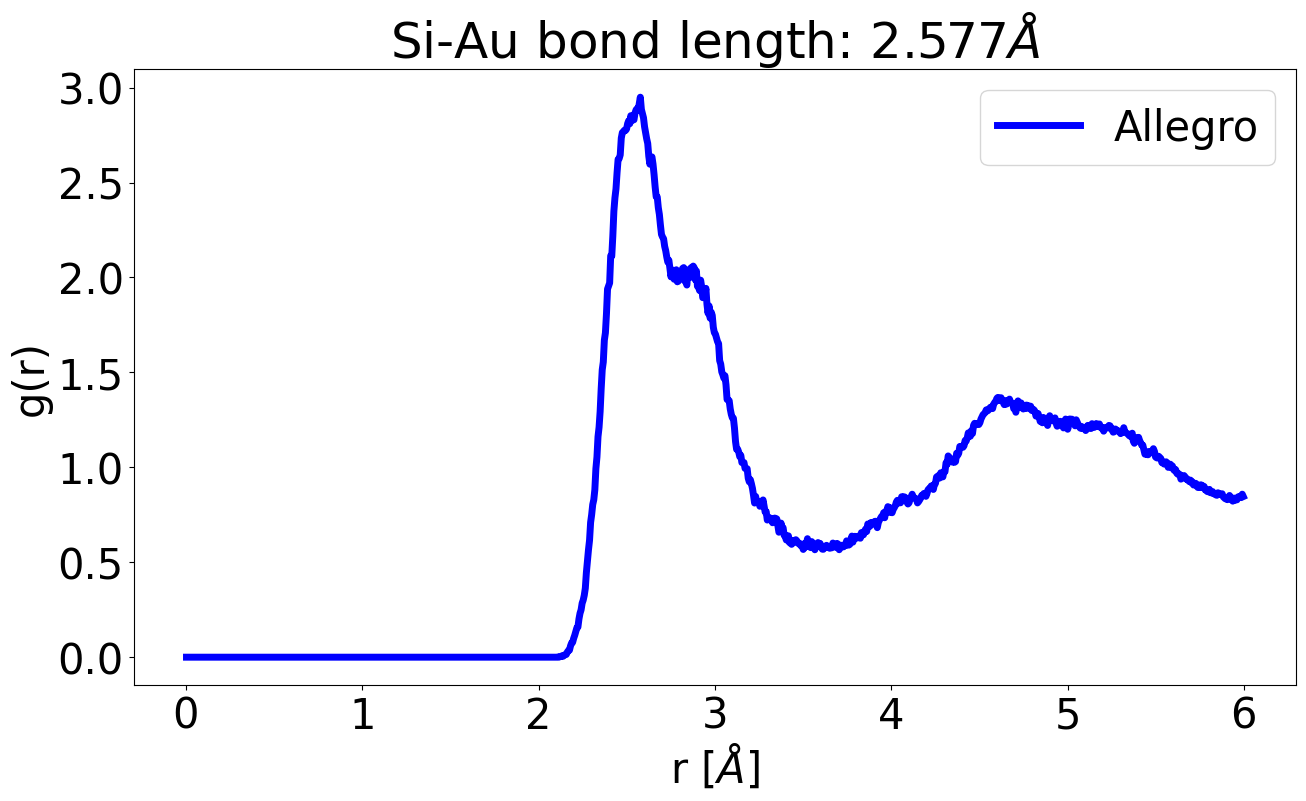

In [8]:
rdf = parse_lammps_rdf('./si3au10.rdf')  # utility function defined earlier
plt.figure(figsize=(15, 8))
plt.plot(rdf[0][0], rdf[0][1], 'b', linewidth=5, label="Allegro")
plt.xlabel(r'r [$\AA$]')  # Use raw string
plt.ylabel(r'g(r)')
plt.title(r"Si-Au bond length: {:.3f}$\AA$".format(rdf[0][0][np.argmax(rdf[0][1])]))  # Use raw string
plt.legend(loc='upper right')
plt.show()